In [2]:
%pip install -Uqq fastai


Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install -Uqq gradio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#|default_exp app

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

/Users/tjadams/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Installing PyTorch with MPS support
%conda install pytorch torchvision torchaudio -c pytorch-nightly

902.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Channels:
 - pytorch-nightly
 - defaults
 - conda-forge
 - fastai
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/tjadams/miniconda3

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fastai-2.7.18              |     pyhd8ed1ab_1         183 KB  conda-forge
    giflib-5.2.2               |       h80987f9_0          78 KB
    libjpeg-turbo-2.0.0        |       h1a28f6b_0         386 KB
    libwebp-1.3.2              |       ha3663a8_0          86 KB
    pytorch-2.6.0.dev20241112  |         py3.12_0        60.0 MB  pytorch-nightly
    torchaudio-2.5.0.dev20241118|        py312_cpu         4.9 MB  pytorch-nightly
    torchvision-0.20.0.dev20241118|        py312_cpu         7.0 MB  pytorch-nightly
    ------------------------------------------------------------
        

In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [4]:
print(torch.backends.mps.is_built())
print(torch.backends.mps.is_available())

print(default_device(1))

True
True
mps


In [5]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192, method='squish'),
    # Passing in the Mac apple silicon device, instead of CPU
    device=default_device(1)
    )

In [6]:
# import platform; 
# print(platform.platform())

device = torch.device("mps")  # Set device to MPS (Apple Silicon GPU)
tensor = torch.ones(2, 2).to(device)
print(tensor)

tensor([[1., 1.],
        [1., 1.]], device='mps:0')


In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.209208,0.089065,0.031123,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.072033,0.075705,0.023681,00:38
1,0.032172,0.043003,0.013532,00:38
2,0.011686,0.042554,0.010825,00:38


In [ ]:
# path = untar_data(URLs.PETS)/'images'

# dls = ImageDataLoaders.from_name_func('.',
#     get_image_files(path), valid_pct=0.2, seed=42,
#     label_func=is_cat,
#     item_tfms=Resize(192))

In [ ]:
# learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
# learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.184049,0.038403,0.010825,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.075693,0.042666,0.013532,00:24
1,0.038955,0.018082,0.006089,00:22
2,0.016343,0.018480,0.004736,00:24


In [8]:
learn.export('model.pkl')

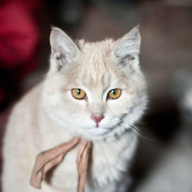

In [10]:
im = PILImage.create('cat.jpg')
im.thumbnail((192,192))
im

In [11]:
#|export
learn = load_learner('model.pkl')

In [12]:
# is_cat? true
learn.predict(im)

('True', tensor(1), tensor([4.3276e-20, 1.0000e+00]))

In [13]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [14]:
classify_image(im)

{'Dog': 4.327582459561269e-20, 'Cat': 1.0}

In [16]:
%pip show gradio

Name: gradio
Version: 5.14.0
Summary: Python library for easily interacting with trained machine learning models
Home-page: https://github.com/gradio-app/gradio
Author: 
Author-email: Abubakar Abid <gradio-team@huggingface.co>, Ali Abid <gradio-team@huggingface.co>, Ali Abdalla <gradio-team@huggingface.co>, Dawood Khan <gradio-team@huggingface.co>, Ahsen Khaliq <gradio-team@huggingface.co>, Pete Allen <gradio-team@huggingface.co>, Ömer Faruk Özdemir <gradio-team@huggingface.co>, Freddy A Boulton <gradio-team@huggingface.co>, Hannah Blair <gradio-team@huggingface.co>
License: 
Location: /Users/tjadams/miniconda3/lib/python3.12/site-packages
Requires: aiofiles, anyio, fastapi, ffmpy, gradio-client, httpx, huggingface-hub, jinja2, markupsafe, numpy, orjson, packaging, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, ruff, safehttpx, semantic-version, starlette, tomlkit, typer, typing-extensions, uvicorn
Required-by: 
Note: you may need to restart the kernel to use updated packag

In [18]:
#|export
# Below is fast.ai's code for gradio v3 but it's a few years old, and now there's gradio v5
# image = gr.inputs.Image(shape=(192, 192))
# label = gr.outputs.Label()
# examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

# intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
# intf.launch(inline=False)

# Here's my gradio v5 fix
with gr.Blocks() as demo:
  gr.Markdown("Upload an image to see if it's a cat or a dog")
  image = gr.Image(height=192, width=192)
  button = gr.Button("Classify")
  label = gr.Label()

  button.click(fn=classify_image, inputs=image, outputs=label)

demo.launch(inline=False)


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## end -

In [21]:
# Preparing the Gradio code (cells prefixed with |export) for being deployed to Hugging Face

# This part is from fast.ai's code but it's a few years old, updated it below
# from nbdev.export import notebook2script
# notebook2script('app.ipynb')

# My fix
import nbdev
nbdev.export.nb_export('app.ipynb', 'generated', name='huggingface_app')
print('Export successful')


Export successful


Converted app.ipynb.
